In [1]:
pip install ucimlrepo


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chess_king_rook_vs_king = fetch_ucirepo(id=23) 
  
# data (as pandas dataframes) 
pozycje = chess_king_rook_vs_king.data.features 
liczba_ruchow = chess_king_rook_vs_king.data.targets 
  
# metadata 
print(chess_king_rook_vs_king.metadata) 
  
# variable information 
print(chess_king_rook_vs_king.variables) 


{'uci_id': 23, 'name': 'Chess (King-Rook vs. King)', 'repository_url': 'https://archive.ics.uci.edu/dataset/23/chess+king+rook+vs+king', 'data_url': 'https://archive.ics.uci.edu/static/public/23/data.csv', 'abstract': 'Chess Endgame Database for White King and Rook against Black King (KRK).', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 28056, 'num_features': 6, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['white-depth-of-win'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C57W2S', 'creators': ['Michael Bain', 'Arthur Hoff'], 'intro_paper': None, 'additional_info': {'summary': "An Inductive Logic Programming (ILP) or relational learning framework is assumed (Muggleton, 1992). The learning system is provided with examples of chess positions described only by the coordinates

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pozycje.loc[:,"black-king-file"]=pozycje.loc[:,"black-king-file"].map(ord)-ord("a")+1
pozycje.loc[:,"white-king-file"]=pozycje.loc[:,"white-king-file"].map(ord)-ord("a")+1
pozycje.loc[:,"white-rook-file"]=pozycje.loc[:,"white-rook-file"].map(ord)-ord("a")+1


In [5]:
x1=pozycje["black-king-file"].astype(float)
x2=pozycje["white-king-file"].astype(float)
y1=pozycje["black-king-rank"].astype(float)
y2=pozycje["white-king-rank"].astype(float)



In [6]:
pozycje["euklides"]=np.sqrt((x1-x2)**2+(y1-y2)**2)
pozycje["manhattan"]=np.abs(x1-x2)+np.abs(y1-y2)
pozycje["czebyszew"]=np.max(pd.concat([np.abs(x1-x2),np.abs(y1-y2)],axis=1),1)


Zad 1.

In [7]:
all=pd.concat([pozycje,liczba_ruchow],axis=1)

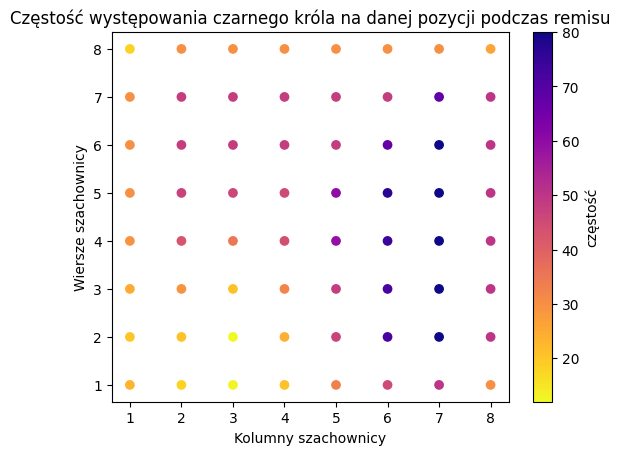

In [8]:
df=all.loc[all["white-depth-of-win"]=="draw",["black-king-file","black-king-rank"]].value_counts().reset_index(name="count")
p=plt.scatter(x=df["black-king-file"],y=df["black-king-rank"],c=df["count"],cmap="plasma_r")
plt.xlabel('Kolumny szachownicy')
plt.ylabel('Wiersze szachownicy')
plt.title('Częstość występowania czarnego króla na danej pozycji podczas remisu')
cbar = plt.colorbar(p)
cbar.set_label('częstość')

Komentarz: Z wykresu jesteśmy w stanie wywnioskować, że czarny król podczas remisu znajdował się głównie po prawej stronie szachownicy w odległości co najmniej 1 od jej krawędzi w kolumnach F i G (czyli 6 i 7). 

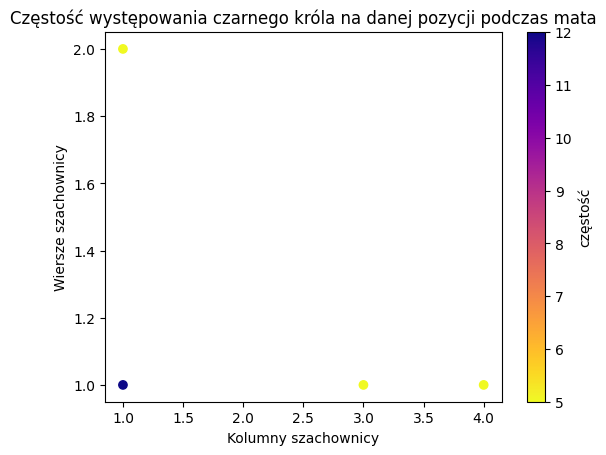

In [9]:
df=all.loc[all["white-depth-of-win"]=="zero",["black-king-file","black-king-rank"]].value_counts().reset_index(name="count")
p=plt.scatter(x=df["black-king-file"],y=df["black-king-rank"],c=df["count"],cmap="plasma_r")
plt.xlabel('Kolumny szachownicy')
plt.ylabel('Wiersze szachownicy')
plt.title('Częstość występowania czarnego króla na danej pozycji podczas mata')
cbar = plt.colorbar(p)
cbar.set_label('częstość')

Komentarz: Zauważamy, że w sytuacji przegranej czarny król znajdował się zazwyczaj w najniższym rzędzie lub w pierwszej kolumnie (za każdym razem przy krawędzi szachownicy). Najczęstrzym miejscem dla czarnego króla podczas mata to (1,A) (inaczej (1,1) jak na wykresie).

Zad 2.

In [10]:

mapping = {
    "zero": 0, "one": 1, "two": 2, "three": 3, "four": 4, 
    "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9, 
    "ten": 10, "eleven": 11, "twelve": 12, "thirteen": 13, 
    "fourteen": 14, "fifteen": 15, "sixteen": 16
}


all['depth_num'] = all['white-depth-of-win'].map(mapping)

In [11]:
without_draw=all.loc[all["depth_num"]!="draw",["euklides","manhattan","czebyszew","depth_num"]]

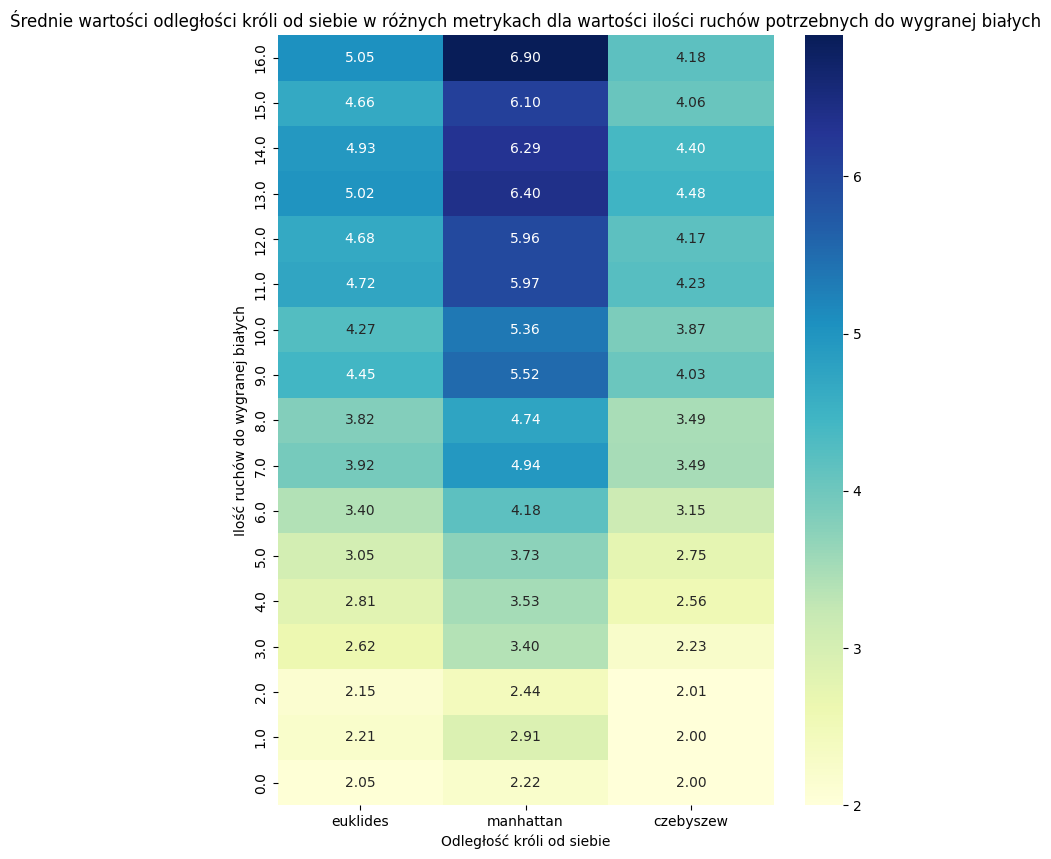

In [12]:
import seaborn as sns

heat_data = without_draw.sort_values("depth_num",ascending=False).groupby('depth_num')[['euklides', 'manhattan', 'czebyszew']].mean()
plt.figure(figsize=(8, 10))
sns.heatmap(heat_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Średnie wartości odległości króli od siebie w różnych metrykach dla wartości ilości ruchów potrzebnych do wygranej białych')
plt.xlabel('Odległość króli od siebie')
plt.ylabel('Ilość ruchów do wygranej białych')
plt.gca().invert_yaxis() 
plt.show()


Komentarz: Z wykresu można wywioskować, że wszystkie metryki działają prawidłowo i pokazują zależność między odległością króli od siebie a ilością ruchów do wygranej białych. Im dalej od siebie są króle, tym więcej ruchów jest potrzebne do końca gry. Patrząc na wykres można zauważyć, że w każdym badanym wierszu (niezależnie od ilości ruchów do wygranej) metryka Czebyszewa przyjmuje najniższe wartości liczbowe (najjaśniejsze pola). Oznacza to, że generuje ona najkrótsze i najbardziej optymalne ścieżki w porównaniu do metryk Euklidesa i Manhattana. Wartości w metryce Czebyszewa maleją najbardziej liniowo i stabilnie wraz ze spadkiem liczby ruchów do wygranej. Metryka Manhattana wykazuje najwyższe wartości średnie (najciemniejsze kolory), co sugeruje, że znacznie zawyża ona realny dystans między obiektami. Metryka Euklidesa plasuje się pomiędzy nimi, nie będąc tak precyzyjną w niskich zakresach jak Czebyszew.

Zad 3.

In [13]:
dist1=all["black-king-file"]-1
dist2=8-all["black-king-file"]
dist3=all["black-king-rank"]-1
dist4=8-all["black-king-rank"]

edge_dist=np.min(pd.concat([dist1,dist2,dist3,dist3,dist4],axis=1),axis=1)
all["dist_edge"]=edge_dist

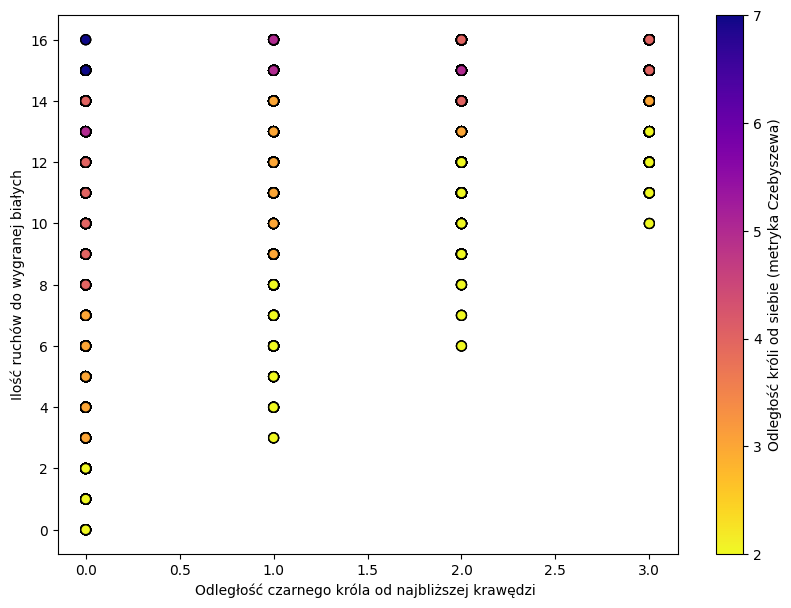

In [15]:
plt.figure(figsize=(10,7))
p=plt.scatter(x=all["dist_edge"],y=all["depth_num"],cmap='plasma_r',s=50,c=all["czebyszew"],edgecolors="black")
plt.xlabel('Odległość czarnego króla od najbliższej krawędzi ')
plt.ylabel('Ilość ruchów do wygranej białych')
cbar = plt.colorbar(p)
cbar.set_label('Odległość króli od siebie (metryka Czebyszewa)')
plt.show()
plt.show()

Komentarz: Na wykresie możemy zauważyć istniejącą korelacje pomiędzy ilością ruchów a odległością czarnego króla od najbliższej krawędzi. Im większa odległość czarnego króla od najbliższej krawędzi to potrzeba większej ilości ruchów do wygranej białych. Co więcej nie widzimy zależności pomiędzy odległością od krawędzi a odległością króli od siebie. Natomiast, tak jak na poprzednim wykresie zauważamy istnieje ona pomiędzy ilością ruchów do wygranej białych a odległością króli od siebie.